In [1]:
import os
import time
from metal.tensor import Tensor as tn
#from metal.layer import Linear as ll
from metal.parameter import Parameter as pr
from metal.flatten import Flatten as fl
from metal.module import Module
from metal.nn import Sequential
from metal.linear import Linear
from metal.act import Relu, Sigmoid 
from metal.loss import CEL
from metal.optim import GD
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing 
from multiprocessing import Process,Pool

In [2]:
from Dataset1 import catnoncat

In [3]:
train_x = catnoncat.train_x() 
test_x = catnoncat.test_img() 
train_x = fl().forward(train_x)
test_x = fl().forward(test_x)

data shape: (12288, 209)
data shape: (12288, 50)


In [4]:
train_x.shape
test_x.shape

(12288, 50)

In [5]:
train_y = tn(catnoncat.train_y())
test_y = tn(catnoncat.test_y())

In [6]:
mod2 = Sequential([
         Linear(50,12288),
            Relu(),
         Linear(20,50),
            Relu(),
         Linear(10,20),
            Relu(),
         Linear(1,10),
            Sigmoid()])

In [7]:
mod2.layers[0].w

Tensor([[-0.0199066  -0.0003952  -0.00792166 ...  0.0014149   0.00110378
  -0.01194174]
 [-0.0285047  -0.01064884 -0.00125678 ...  0.02275022 -0.02293293
  -0.01100655]
 [-0.00853839  0.00029538  0.01892586 ...  0.00322287  0.00046938
   0.00298893]
 ...
 [ 0.00363521  0.01423374 -0.00154108 ... -0.0014864  -0.01104415
  -0.039123  ]
 [-0.01525924  0.00211053  0.00034137 ...  0.01443107  0.00165386
   0.0049637 ]
 [-0.01072301 -0.02353046  0.01253868 ... -0.00734199  0.00587365
   0.02215795]], requires_grad=True)

In [16]:
def train(mod):
    optimizer = GD(lr=.0075)

    costs = []

    for epoch in range(400):

        epoch_loss = 0.0

        for l in mod.layers:
            l.zero_grad()

        out = mod.forward(train_x)
        cout = CEL(out,train_y)
        loss = cout.sum()

        loss.backward()
        epoch_loss += loss.data

        for l in mod.layers:
            optimizer.step(l)


        if epoch % 100 == 0:
            print(epoch, epoch_loss)
        if epoch % 100 == 0:
            costs.append(epoch_loss)


    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.show()
    mod.predict(test_x,test_y)

0 0.7544704264136884
100 0.4697075751603011
200 0.3534337046756613
300 0.24095093372188595


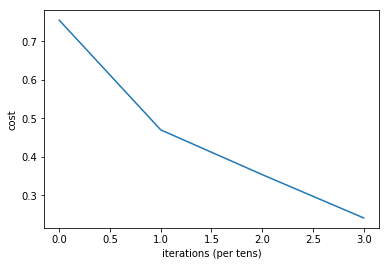

Accuracy: 0.66
0 0.7544704264136884
100 0.4697075751603011
200 0.3534337046756613
300 0.24095093372188595


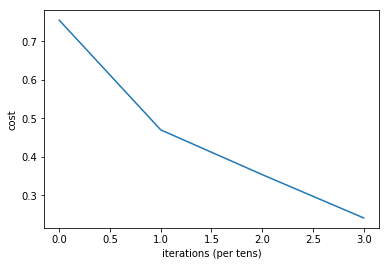

Accuracy: 0.66
0 0.7544704264136884
100 0.4697075751603011


Process ForkPoolWorker-1:
Process ForkPoolWorker-69:
Process ForkPoolWorker-100:
Process ForkPoolWorker-24:
Process ForkPoolWorker-98:
Process ForkPoolWorker-30:
Process ForkPoolWorker-2:
Process ForkPoolWorker-99:
Process ForkPoolWorker-42:
Process ForkPoolWorker-94:
Process ForkPoolWorker-46:
Process ForkPoolWorker-83:
Process ForkPoolWorker-81:
Process ForkPoolWorker-45:
Process ForkPoolWorker-43:
Process ForkPoolWorker-52:
Process ForkPoolWorker-95:
Process ForkPoolWorker-96:
Process ForkPoolWorker-80:
Process ForkPoolWorker-84:
Process ForkPoolWorker-82:
Process ForkPoolWorker-9:
Process ForkPoolWorker-90:
Process ForkPoolWorker-22:
Process ForkPoolWorker-79:
Process ForkPoolWorker-27:
Process ForkPoolWorker-86:
Process ForkPoolWorker-87:
Process ForkPoolWorker-28:
Process ForkPoolWorker-37:
Process ForkPoolWorker-15:
Process ForkPoolWorker-18:
Process ForkPoolWorker-74:
Process ForkPoolWorker-11:
Process ForkPoolWorker-77:
Process ForkPoolWorker-71:
Process ForkPoolWorker-78:
Pro

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootst

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/py

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/pyt

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/an

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95,

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return se

  [Previous line repeated 6 more times]
  File "/Users/miguel/Documents/python apps/py3.6/dlgork/Metal_py/metal/metal/tensor.py", line 133, in backward
    backward_grad = dependency.grad_fn(grad.data)
  File "/Users/miguel/Documents/python apps/py3.6/dlgork/Metal_py/metal/metal/linear.py", line 72, in grad_fn_w
    grad = (1.0 / self.m) * (grad @ self.inputs.data.T)
KeyboardInterrupt


KeyboardInterrupt: 

Process ForkPoolWorker-173:
Process ForkPoolWorker-169:
Process ForkPoolWorker-170:
Process ForkPoolWorker-107:
Process ForkPoolWorker-171:
Process ForkPoolWorker-119:
Process ForkPoolWorker-196:
Process ForkPoolWorker-137:
Process ForkPoolWorker-103:
Process ForkPoolWorker-135:
Process ForkPoolWorker-117:
Process ForkPoolWorker-116:
Process ForkPoolWorker-136:
Process ForkPoolWorker-191:
Process ForkPoolWorker-182:
Process ForkPoolWorker-142:
Process ForkPoolWorker-185:
Process ForkPoolWorker-123:
Process ForkPoolWorker-101:
Process ForkPoolWorker-194:
Process ForkPoolWorker-156:
Process ForkPoolWorker-155:
Process ForkPoolWorker-105:
Process ForkPoolWorker-112:
Process ForkPoolWorker-178:
Process ForkPoolWorker-114:
Process ForkPoolWorker-131:
Process ForkPoolWorker-184:
Process ForkPoolWorker-102:
Process ForkPoolWorker-198:
Process ForkPoolWorker-111:
Process ForkPoolWorker-180:
Process ForkPoolWorker-164:
Process ForkPoolWorker-115:
Process ForkPoolWorker-151:
Process ForkPoolWork

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/m

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/m

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()


  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/m

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/Users/miguel/an

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    retu

  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/Users/miguel/anaconda/envs/py36/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    retu

In [9]:


if __name__ == '__main__':
    start_time = time.time()
    p = Pool(processes=260)
    data = p.map(train, [mod2])
    p.close()
    
    print("--- %s seconds ---" % (time.time() - start_time))


In [10]:
data.predict(test_x,test_y)

NameError: name 'data' is not defined

In [17]:
c = map(train,[mod2])

In [18]:
c

In [19]:
train(mod2)

0 0.7544704264136884
100 0.4697075751603011


KeyboardInterrupt: 